<a href="https://colab.research.google.com/github/DrMorganJones/ACS6427/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratory Class Two: Regularization and Cross-Validation**

Morgan Jones*

## **1  Goal:**

This lab supplements the lecture material on regularization and cross validation. The intended learning outcomes of this lab
are as follows:
1. To be able to argue the importance of regularization.
2. To be able preform ridge regularization.
3. To be able to use cross validation to preform hyper-parameter tuning.



## **2   Background Material**

**Regularization:** Suppose we are given a labelled data set $(x_i, y_i)_{i=1}^n$ and asked to fit the following regressor model,

\begin{equation}
    y = \sum_{i=1}^m \theta_i \phi_i(x) + \varepsilon,  \tag{1}
\end{equation}

where $\{\phi_i\}$ are general basis functions.
In the previous lab we saw that this problem can be formulated as an Ordinary Least Squares (OLS) problem. However,
to prevent overfitting to noise in the training data we would now like to find the simplest model that best fits the data. That is
we would like to find the model where the magnitude/size of $\theta$ is as small as possible. This can be achieved by solving the
OLS problem with $L^2$ (ridge) regularization. Given a matrix $X \in \mathbb{R}^{n \times m}$, a vector $Y \in \mathbb{R}^n$ and regularization parameter $\lambda > 0$, the OLS problem with $L^2$ (ridge) regularization is formulated as,

\begin{equation}
    \theta^* = \arg\min_{\theta \in \mathbb{R}^m} \| X\theta - Y \|_2^2 + λ\|\theta\|_2^2 ,  \tag{2}
\end{equation}

where $\|\theta\|_2:=\sqrt{\sum_{i=1}^{m}{\theta^2_i}}$.

We have seen in lectures that the analytical solution of Problem (2) is given by,

\begin{equation}
    \theta^* = (X^\top X + \lambda I)^{-1} X^\top Y.  \tag{3}
\end{equation}

Fitting the model given in Equation (1) with ridge regularization parameter $\lambda > 0$ requires us to solve Optimization
Problem (2) with the following regressor matrices,

\begin{equation}
Y = \begin{bmatrix}
y_1 \\ \vdots \\ y_n
\end{bmatrix}, \quad
\theta = \begin{bmatrix}
\theta_1 \\ \vdots \\ \theta_m
\end{bmatrix}, \quad
X = \begin{bmatrix}
\phi_1(x_1) & \phi_2(x_1) & \cdots & \phi_m(x_1) \\
\vdots & \vdots & \ddots & \vdots \\
\phi_1(x_n) & \phi_2(x_n) & \cdots & \phi_m(x_n)
\end{bmatrix}.  \tag{4}
\end{equation}

We have also also encountered $L^1$ (Lasso) regularization that amounts to solving the following optimization problem,

\begin{equation}
    \theta^* = \arg\min_{\theta \in \mathbb{R}^m} \| X\theta - Y \|_2^2 + λ\|\theta\|_1 ,  \tag{5}
\end{equation}

where $\|\theta\|_1:=\sum_{i=1}^{m}{|\theta_i|}.$

Unlike Optimization Problem (2), Optimization Problem (5) does not have an analytical solution. However Optimization Problem (5) can be solved approximately to arbitrary accuracy using nonlinear optimization solvers (like Python's `scipy.optimize.fmin` or `scipy.optimize.minimize`) or lifted and solved as a linear programming problem.

**Cross-Validation:** Cross-validation is a fundamental technique in machine learning and model evaluation. It helps us assess
the generalization performance of a predictive model. The process involves splitting the dataset into $k$ equal-sized folds, as
shown in Figure 1.

<div align="center">
  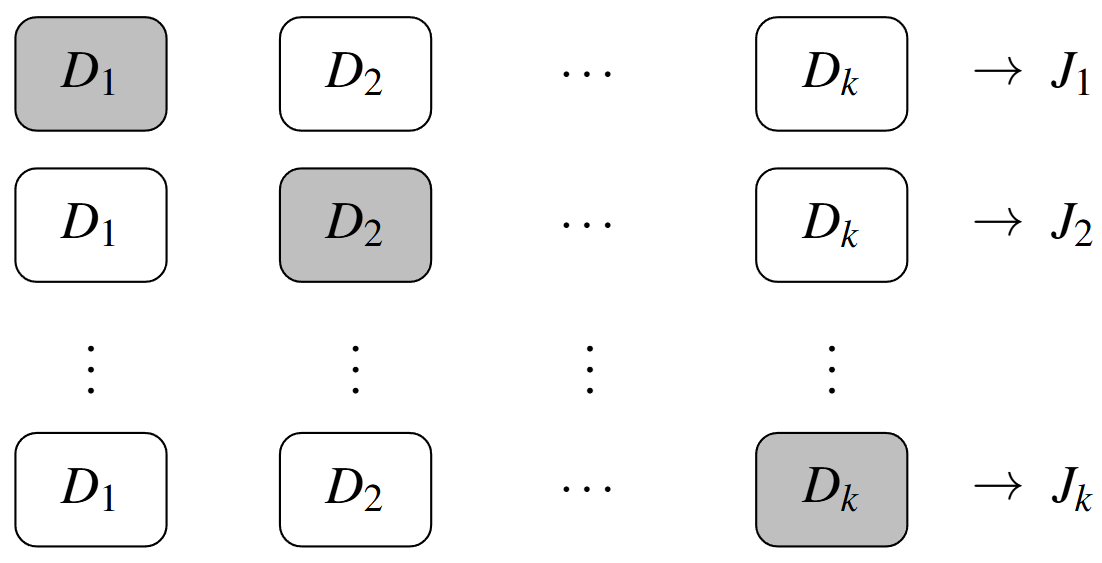
  <p><b>Figure 1:</b> K-Fold Cross-Validation Diagram.</p>
</div>

The main idea is to iterate through each fold, holding it out as a validation set while training the model on the remaining
data. This ensures that each data point gets an opportunity to be part of the validation set. After each iteration, the model's
performance is evaluated, typically using a performance metric like Mean Squared Error (MSE). If we hold out fold $D_i$
let us
denote the trained model on the remaining data by $\hat{f_i}$
, then the validation error of this model is given by,

\begin{equation}
J_i = \frac{1}{|D_i|} \sum_{(x,y) \in D_i} \left( y - \hat{f_i}(x) \right)^2
\end{equation}


The final evaluation metric is computed as the average over all iterations, as shown in the equation below:

\begin{equation}
\text{Performance} = \frac{1}{k}\sum_{i=1}^{k}J_i  \tag{6}
\end{equation}


Cross-validation provides an estimate on the model's ability to generalize outside of the training data set. For practical
applications cross-validation provides a better metric on the performance of a model than simply MSE over the entire training
data set. Cross-validation is a crucial tool in machine learning for making informed decisions about model selection and
hyperparameter tuning.


**Hyperparamter tunning:** Figure 2 represents a process known as k-fold cross-validation with hyperparameter tuning. It's
a commonly used technique in machine learning for assessing the performance of a predictive model and selecting the best
hyperparameters. Let's break down the diagram step by step:

1. Data: The process starts with a dataset denoted as D. This dataset contains pairs of input features (usually denoted as $x$) and their corresponding target/output values (usually denoted as $y$).

2. Discretize Hyperparameters: The next step is to discretize the hyperparameters of the machine learning model. These hyperparameters are represented as $\lambda_1,\lambda_2,\ldots,\lambda_N$. Discretization may involve defining a range of values or specific values to test for each hyperparameter.

3. Split into $k$ Folds: The dataset $D$ is divided into $k$ subsets or folds, denoted as $D_1,D_2,\ldots,D_k$. Each fold will be used as a test set while the others are used for training. This step helps in assessing the model's performance on different subsets of the data.

4. Train Model: For each fold $D_i$ and for each hyperparameter $\lambda_i$, a model is trained on the remaining $k-1$ folds, which is represented as $\cup_{j \neq i} D_j$. This step is performed for each combination of fold $D_i$ and hyperparameter $\lambda_l$, resulting in multiple models we index by $(i,l)$ and denote by $\hat{f}_{i,l}$.

5. Validate Model: After training, each model is validated using the data from its corresponding fold $D_i$. The model's performance is evaluated using a loss or error metric, which in this case is represented as $J_{i,l}$. It measures how well the model's predictions match the actual target values on the validation fold.

6. Average Performance: The individual performance metrics $J_{i,l}$ for each fold and hyperparameter are averaged to obtain an overall performance metric for hyperparameter $\lambda_l$. This averaged metric is denoted as $\hat{J_l}$.

7. Select Best Hyperparameter: The hyperparameter tuning step aims to select the best hyperparameter $λ^*$ from the set of hyperparameters $\lambda_1,\lambda_2,\ldots,\lambda_N$. The best hyperparameter is chosen based on which one results in the lowest average performance $\hat{J_l}$.

8. Final Model: Once the best hyperparameter $λ^*$ is selected, the final model is trained using the entire dataset D with this optimal hyperparameter. This final model is expected to be the best-performing model for the given task.

<div align="center">
  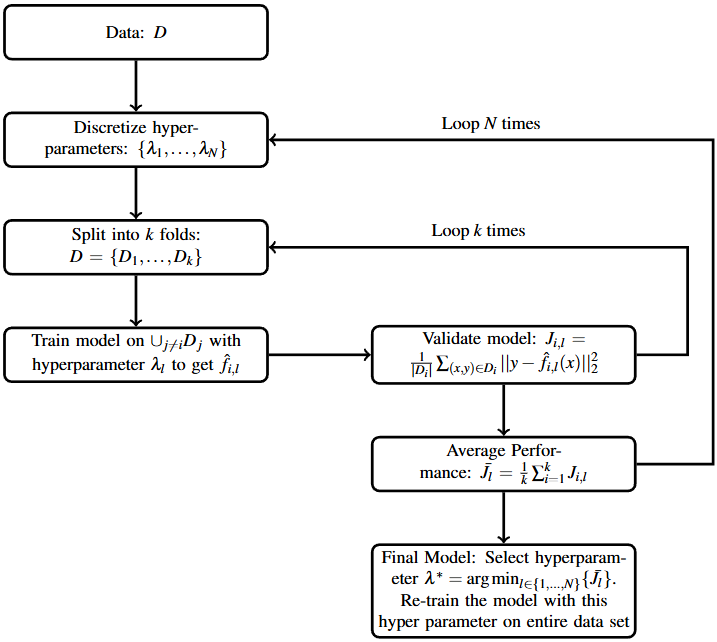
  <p><b>Figure 2:</b> Hyperparameter Tuning using K-fold Cross-validation.</p>
</div>

## **3  Exercises**

### **3.1 Task 1**

The goal of Task 1 is to re-create Fig. 3 that was presented in Lecture 4.

**Task 1.1:** What was Fig. 3 used to explain during lectures?

**Hint:** This task does not require you to code anything, just recap the lecture notes.

**Answer 1.1:** When we use regularization techniques like $L^1$ or $L^2$ regularization, we are essentially adding a penalty term to the objective function that the optimization algorithm seeks to minimize. The objective function becomes $J(θ) = F_1(θ) + F_2(θ)$, where $F_1(θ) = \| X\theta - Y \|_2^2$ is the regular OLS objective and $F_2(θ)$ is the new component of the objective due to regularization ($\lambda\|\theta\|_2^2$ or $\lambda\|\theta\|_1$). The objective function is typically represented as a high dimensional surface, $\{(\theta, y) \in \mathbb{R}^m \times \mathbb{R} : y = J(\theta)\}$. This objective function can be visualized as a landscape with valleys and hills. We can take slices of this surface and visualize them as contours (similar to a geography map).

Figure 3 illustrates the impact of regularization on the solution to a two-dimensional Ordinary Least Squares (OLS) problem, that is $\theta \in \mathbb{R}^2$. The introduction of either $\|\theta\|_2$ ($L^2 $ regularization) or $\|\theta\|_1$ ($L^1$ regularization) nudges the optimal solution closer to the origin. By definition, as one moves along a contour line, the objective function's value remains constant. Consequently, the optimal solution lies at the intersection of these contour lines of the two components of the objective. To support this claim, consider the following contradiction: suppose the optimal solution, $\theta^*$, did not lie at the intersection point. In that case, we could travel along the contour line $\{\theta \in \mathbb{R}^2 : F_1(\theta)=F_1(\theta^*)\}$ without altering its value of $F_1$. While moving along this contour line we could simultaneously cross through the contour lines that correspond to smaller values of $F_2$ (since we are not at an intersection point). This would result in a lower overall objective value, $J(\theta) = F_1(\theta)+F_2(\theta)$. This contradiction disproves our initial assumption that the optimal solution does not lie at the intersection of the contour lines.

In the case of $L^1$ regularization, the contour lines take on a diamond-like shape. This geometric characteristic increases the likelihood of the intersection occurring at a corner. These corners correspond to instances where some components of the parameter vector $\theta$ are exactly zero. As a result, Lasso (L1 regularization) proves superior in inducing a sparse solution
compared to Ridge (L2 regularization). A sparse solution is characterized by having multiple zero entries in $\theta$.

<div align="center">
  <table>
    <tr>
      <td align="center">
        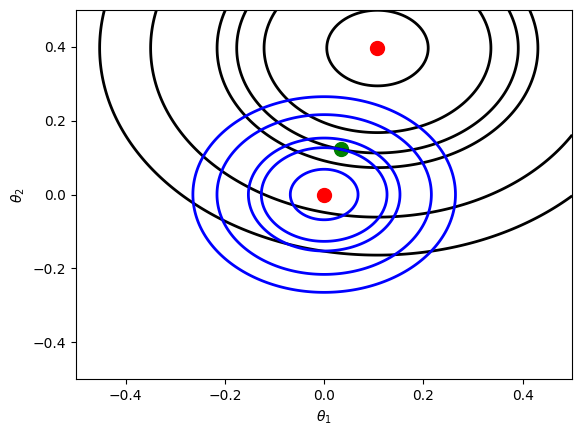<br>
        <b>(a)</b> The impact of ridge regularization on OLS solution.
      </td>
      <td align="center">
        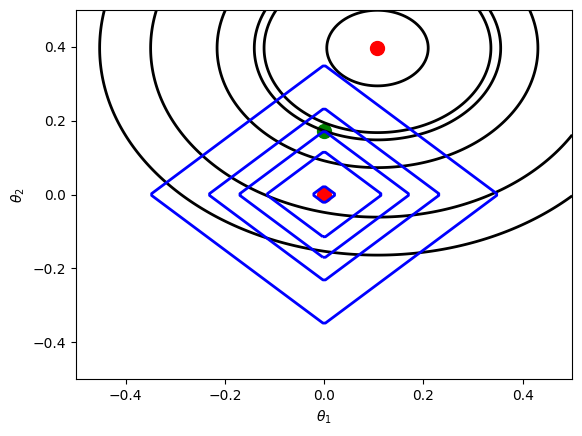<br>
        <b>(b)</b> The impact of Lasso regularization on OLS solution.
      </td>
    </tr>
  </table>
</div>

<div align="justify">
  <b>Figure 3:</b> Plot showing the contour lines (level sets) of the functions
  $F_1$ and
  $F_2$ given by the black and blue lines respectively.
  In both subplots,
  $F_1(\theta) := \| X\theta - Y \|_2^2$.
  In Fig. 3a we have $F_2(\theta) = \lambda_2 \|\theta\|_2^2$,
  and in Fig. 3b we have $F_2(\theta) = \lambda_1 \|\theta\|_1$.
  Red points represent where the minimum of either
  $F_1$ or $F_2$ occurs. The green point represents
  where the minimum of $F_1 + F_2$ occurs.
</div>

**Task 1.2:** The `peaks` function is a synthetic surface commonly used for visualization and demonstration. It is defined by the formula:

\begin{equation}
y = peaks(x_1, x_2) = 3(1 - x_1)^2 e^{-x_1^2 - (x_2 + 1)^2} - 10\left(\frac{x_1}{5} - x_1^3 - x_2^5\right) e^{-x_1^2 - x_2^2} - \frac{1}{3} e^{-(x_1 + 1)^2 - x_2^2}. \tag{7}
\end{equation}

While this is a built-in function in MATLAB, it is not available by default in Python. Therefore, it needs to be manually defined, which has been done for you.

```
def peaks(x, y):
    return (3 * (1 - x)**2 * np.exp(-x**2 - (y + 1)**2)
        - 10 * (x / 5 - x**3 - y**5) * np.exp(-x**2 - y**2)
        - 1/3 * np.exp(-(x + 1)**2 - y**2))
```

Discretize $[−3,3]^2 \subset \mathbb{R}^2$ with gap size $0.05$ to get discrete points $x_i ∈ \{(-3,-3),(-3,-2.95),(-3,-2.9),...(3,3)\}$
to generate a data set, $(x_i, y_i)_{i=1}^n$, from the `peaks` model.

**Answer 1.2:**

In [ ]:
import numpy as np

def peaks(x, y):
    return (3 * (1 - x)**2 * np.exp(-x**2 - (y + 1)**2)
        - 10 * (x / 5 - x**3 - y**5) * np.exp(-x**2 - y**2)
        - 1/3 * np.exp(-(x + 1)**2 - y**2))

x_p = np.arange(-3, 3.05, 0.05)
y_p = np.arange(-3, 3.05, 0.05)

X1, X2 = np.meshgrid(x_p, y_p)
X3 = peaks(X1, X2)

x1 = X1.flatten()
x2 = X2.flatten()
Y = X3.flatten()

**Task 1.3:** Use OLS to fit the following model to the data generated from the peaks function,

\begin{equation}
    y = \theta_1x_1 + \theta_2x_2 + \varepsilon.  \tag{8}
\end{equation}

Denote the computed optimal parameters by:

\begin{equation}
    \texttt{theta_star_ols} \in \mathbb{R}^2.  \tag{9}
\end{equation}

**Hint 1:** No regularization required.

**Hint 2:** What are the basis functions required to express this model as the form given in Eq. (1)? Use this to find $Y$ and $X$
from Eq. (4) and substitute into the analytical OLS solution.

**Answer 1.3:**

In [ ]:
Psi_1 = np.stack((x1, x2), axis=1)
theta_star_ols = np.linalg.inv(Psi_1.T @ Psi_1) @ Psi_1.T @ Y

**Task 1.4:** Fit the model given in Equation (8) to the peaks data with ridge regularization parameter $\lambda = 10^5$. Denote the computed optimal parameters by:

\begin{equation}
    \texttt{theta_star_L2} \in \mathbb{R}^2.  \tag{10}
\end{equation}

**Hint:** Apply the analytical equation for ridge regularization given in Equation (3).

**Answer 1.4:**

In [ ]:
gam2 = 10**5;
theta_star_L2 = np.linalg.inv(Psi_1.T @ Psi_1 + gam2 * np.eye(2)) @ Psi_1.T @ Y

**Task 1.5:** Calculate the value of $F_1(θ) = \| X\theta - Y \|_2^2$ where $X$ and $Y$ are the regressor matrices found in Task 1.3 and $\theta$ is given by Equation (9). Denote this computed value by:

\begin{equation}
    \texttt{min_OLS} \in \mathbb{R}.  \tag{11}
\end{equation}

**Answer 1.5:**

In [ ]:
min_OLS = (Psi_1 @ theta_star_ols - Y).T @ (Psi_1 @ theta_star_ols - Y)
print(min_OLS)

46709.87011270896


**Task 1.6:** Calculate the value of $F_1(θ) = \| X\theta - Y \|_2^2$ where $X$ and $Y$ are the regressor matrices found in Task 1.3 and $\theta$ is given by Equation (10). Denote this computed value by:

\begin{equation}
    \texttt{min_OLS_L2} \in \mathbb{R}.  \tag{12}
\end{equation}

**Answer 1.6:**

In [ ]:
min_OLS_L2 = (Psi_1 @ theta_star_L2 - Y).T @ (Psi_1 @ theta_star_L2 - Y)
print(min_OLS_L2)

50307.08599953387


**Task 1.7:** Why is $\texttt{min_OLS_L2} \geq \texttt{min_OLS}$?

**Answer 1.7:** $\texttt{min_OLS} = \min_\theta \| X\theta - Y \|_2^2$ and hence $\texttt{min_OLS} \leq \min_\theta \| X\theta - Y \|_2^2$ for all $\theta \in \mathbb{R}^2$. In particular, $\texttt{min_OLS} \leq \| X(\texttt{theta_star_L2}) - Y \|_2^2 = \texttt{min_OLS_L2}$.

**Task 1.8:** Calculate the value of $F_2(\theta) = \lambda_2\|\theta\|_2^2$ where $\lambda = 10^5$ and $\theta$ is given by Equation (10). Denote this computed value by:

\begin{equation}
    \texttt{min_L2} \in \mathbb{R}.  \tag{13}
\end{equation}

**Answer 1.8:**

In [ ]:
min_L2 = gam2 * (theta_star_L2.T @ theta_star_L2)
print(min_L2)

1606.3385528696062


**Task 1.9:** Recreate Fig. 3a. To do this you need to make a scatter plot of the points $\texttt{theta_star_ols} \in \mathbb{R}^2$ (the minimum of $F_1(\theta) = \|X\theta - Y\|_2^2$ and computed in Equation (9)) and $(0, 0) \in \mathbb{R}^2$ (the minimum of $F_2(\theta) = \lambda\|\theta\|_2^2$) as red points. You will also need to plot $\texttt{theta_star_L2} \in \mathbb{R}^2$
(the minimum of $J(\theta) := F_1(\theta) + F_2(\theta)$ and computed in Equation (10)) as a green point. Finally, you will need to create a contour plot for $F_1(\theta) = \|X\theta - Y\|_2^2$ at levels

$\left[\texttt{min_OLS_L2},\ 1.01 \cdot \texttt{min_OLS},\ 1.05 \cdot \texttt{min_OLS},\ 1.1 \cdot \texttt{min_OLS},\ 1.2 \cdot \texttt{min_OLS},\ 1.3 \cdot \texttt{min_OLS} \right]$;

and a contour plot of the function $F_2(\theta) = \lambda\|\theta\|_2^2$ for $\lambda = 10^5$ at the levels

$\left[\texttt{min_L2},\ 0.01 \cdot \texttt{min_OLS},\ 0.05 \cdot \texttt{min_OLS},\ 0.1 \cdot \texttt{min_OLS},\ 0.15 \cdot \texttt{min_OLS} \right]$;

where
$\texttt{min_OLS_L2} \in \mathbb{R}$ was computed in Equation (12),
$\texttt{min_OLS} \in \mathbb{R}$ was computed in Equation (11), and
$\texttt{min_L2} \in \mathbb{R}$ was computed in Equation (13).

**Answer 1.9:**

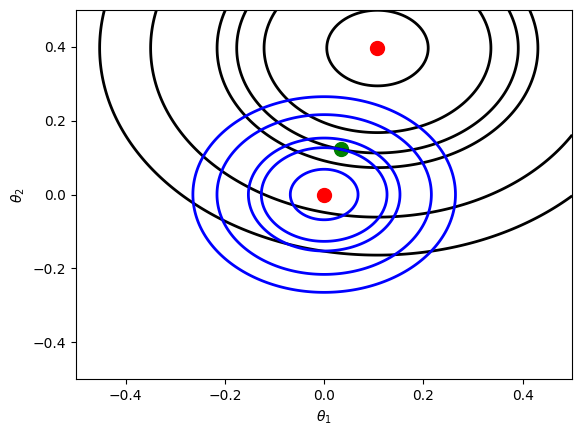

In [ ]:
import matplotlib.pyplot as plt

def obj_OLS(th1, th2):
  THETA = np.vstack((th1.ravel(), th2.ravel()))
  residuals = Psi_1 @ THETA - Y[:, np.newaxis]  # shape (N_data, N_grid_points)
  Z = np.sum(residuals**2, axis=0)
  return Z.reshape(th1.shape)

def obj_L2(th1, th2):
  return gam2 * (th1**2 + th2**2)

theta1 = np.linspace(-0.5, 0.5, 200)
theta2 = np.linspace(-0.5, 0.5, 200)
Theta1, Theta2 = np.meshgrid(theta1, theta2)
J_ols = obj_OLS(Theta1, Theta2)
J_L2 = obj_L2(Theta1, Theta2)

levels_OLS_L2 = sorted([min_OLS_L2, 1.01 * min_OLS, 1.05 * min_OLS, 1.1 * min_OLS, 1.2 * min_OLS, 1.3 * min_OLS])
plt.contour(Theta1, Theta2, J_ols, levels=levels_OLS_L2, colors='k', linewidths=2)

levels_L2 = sorted([min_L2, 0.01 * min_OLS, 0.05 * min_OLS, 0.1 * min_OLS, 0.15 * min_OLS]);
plt.contour(Theta1, Theta2, J_L2, levels=levels_L2, colors='b', linewidths=2)

plt.scatter(theta_star_ols[0], theta_star_ols[1], color='r', s=100)
plt.scatter(theta_star_L2[0], theta_star_L2[1], color='g', s=100)
plt.scatter(0, 0, color='r', s=100)
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.show()

**Task 1.10:** Fit the model given in Equation (8) to the peaks data with lasso regularization parameter $\lambda = 2e4$. Denote the
computed optimal parameters by:

\begin{equation}
    \texttt{theta_star_L1} \in \mathbb{R}^2.  \tag{14}
\end{equation}

**Hint:** There is no analytical equation for lasso regularization. To solve this problem you could use Python's `minimize` function from `scipy.optimize` to minimize $J(θ) = \| X\theta - Y \|_2^2 + 2e4\|\theta\|_1$.

**Answer 1.10:**

In [ ]:
from scipy.optimize import minimize

gam1 = 2e4

def obj_L1(th1, th2):
    return gam1 * (np.abs(th1) + np.abs(th2))

def obj_lasso(theta):
    return obj_OLS(theta[0], theta[1]) + obj_L1(theta[0], theta[1])

res_lasso = minimize(obj_lasso, x0=np.zeros(2), method='Nelder-Mead')
theta_star_L1 = res_lasso.x

**Task 1.11:** Calculate the value of $F_1(θ) = \| X\theta - Y \|_2^2$ where $\theta$ is given by Equation (14). Denote this computed value by:

\begin{equation}
    \texttt{min_OLS_L1} \in \mathbb{R}.  \tag{15}
\end{equation}


Calculate the value of $F_2(\theta) = \lambda\|\theta\|_1$ where $\lambda = 2e4$ and $\theta$ is given by Equation (14). Denote this computed value by:

\begin{equation}
    \texttt{min_L1} \in \mathbb{R}.  \tag{16}
\end{equation}

**Answer 1.11:**

In [ ]:
min_OLS_L1 = (Psi_1 @ theta_star_L1 - Y).T @ (Psi_1 @ theta_star_L1 - Y)
print("min_OLS_L1 =",min_OLS_L1)

min_L1 = gam1 * np.sum(np.abs(theta_star_L1))
print("min_L1 =",min_L1)

min_OLS_L1 = 49465.3624626174
min_L1 = 3445.9059742063864


**Task 1.12:** Recreate Fig. 3b. To do this you need to make a scatter plot of the points $\texttt{theta_star_ols} \in \mathbb{R}^2$ (the minimum of $F_1(\theta) = \|X\theta - Y\|_2^2$ and computed in Equation (9)) and $(0, 0) \in \mathbb{R}^2$ (the minimum of $F_2(\theta) = \lambda\|\theta\|_1$) as red points. You will also need to plot $\texttt{theta_star_L1} \in \mathbb{R}^2$
(the minimum of $J(\theta) := F_1(\theta) + F_2(\theta)$ and computed in Equation (14)) as a green point. Finally, you will need to create a contour plot for $F_1(\theta) = \|X\theta - Y\|_2^2$ at levels

$\left[\texttt{min_OLS_L1},\ 1.01 \cdot \texttt{min_OLS},\ 1.05 \cdot \texttt{min_OLS},\ 1.1 \cdot \texttt{min_OLS},\ 1.2 \cdot \texttt{min_OLS},\ 1.3 \cdot \texttt{min_OLS} \right]$;

and a contour plot of the function $F_2(\theta) = \lambda\|\theta\|_1$ for $\lambda = 2e4$ at the levels

$\left[\texttt{min_L1},\ 0.01 \cdot \texttt{min_OLS},\ 0.05 \cdot \texttt{min_OLS},\ 0.1 \cdot \texttt{min_OLS},\ 0.15 \cdot \texttt{min_OLS} \right]$;

where
$\texttt{min_OLS_L1} \in \mathbb{R}$ was computed in Equation (15),
$\texttt{min_OLS} \in \mathbb{R}$ was computed in Equation (11), and
$\texttt{min_L2} \in \mathbb{R}$ was computed in Equation (16).

**Answer 1.12:**

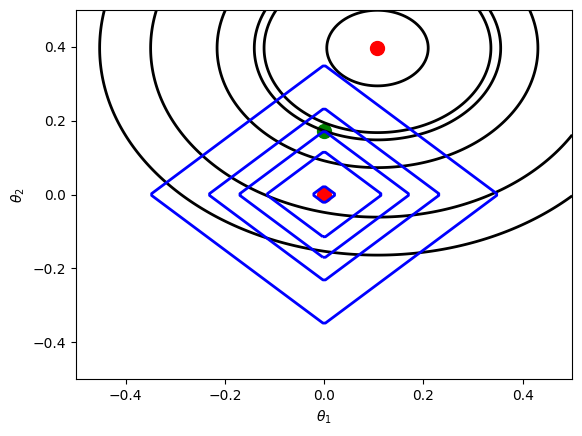

In [ ]:
J_L1 = obj_L1(Theta1, Theta2)

levels_OLS_L1 = sorted([min_OLS_L1, 1.01 * min_OLS, 1.05 * min_OLS, 1.1 * min_OLS, 1.2 * min_OLS, 1.3 * min_OLS])
plt.contour(Theta1, Theta2, J_ols, levels=levels_OLS_L1, colors='k', linewidths=2)

levels_L1 = sorted([min_L1, 0.01 * min_OLS, 0.05 * min_OLS, 0.1 * min_OLS, 0.15 * min_OLS]);
plt.contour(theta1, theta2, J_L1, levels=levels_L1, colors='b', linewidths=2)

plt.scatter(theta_star_ols[0], theta_star_ols[1], color='r', s=100)
plt.scatter(theta_star_L1[0], theta_star_L1[1], color='g', s=100)
plt.scatter(0, 0, color='r', s=100)
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.show()

### **3.2 Task 2**

The goal of Task 2 is to practice hyper-parameter tuning. In this task we would like to recreate Figure 4.

**Task 2.1:** Explain Figure 4.

**Hint:** This task does not require you to code anything, just recap the lecture notes.

**Answer 2.1:** As the regularization parameter is increased the model is penalized for complexity and hence becomes more simple. Initially this improves performance since it helps mitigate overfitting (the model being over sensitive to noise). However, as the regularization parameter keeps increasing eventually the performance decreases as the model becomes too simple to explain the data.

**Task 2.2:** For discrete points $x \in \{0, 0.01, 0.02, 0.03, \ldots, 10\}$ generate a data set $(x_i, y_i)^n_{i=1}$ from the following model,

\begin{equation}
y = e^{-(x-2)^2} + 2\varepsilon, \quad \varepsilon \sim \mathcal{U}(-0.5, 0.5) \tag{17}
\end{equation}

**Hint:** $\varepsilon \sim \mathcal{U}(-0.5, 0.5)$ means that $\varepsilon$ has a uniform distribution within $[-0.5,0.5]$. The Python function `np.random.uniform` samples uniformly distributed values given the range $[-0.5,0.5]$.

**Answer 2.2:**

In [ ]:
np.random.seed(13)

x = np.arange(0, 10.01, 0.01)[:, np.newaxis]
y = np.exp(-(x-2)**2) + 2 * np.random.uniform(-0.5, 0.5, size=x.shape)

**Task 2.3:** Using the data set $(x_i, y_i)^n_{i=1}$, generated from the model given by Eq. (17), fit the following sixth-order polynomial
model with ridge regularization parameter $\lambda = 10$,

\begin{equation}
y = \theta_1 + \sum_{i=1}^{6} \theta_{i+1} x^i + \varepsilon  \tag{18}
\end{equation}

**Answer 2.3:**

In [ ]:
deg = 6
gam3 = 10

Psi_2 = np.ones((np.size(x),1))
Psi_2_size = (Psi_2.T @ Psi_2).shape

for i in range(1,deg + 1):
  Psi_2 = np.concatenate((Psi_2,x**i),axis=1)

theta_star_3 = np.linalg.inv(Psi_2.T @ Psi_2 + gam3*np.eye(Psi_2_size[0], Psi_2_size[1])) @ Psi_2.T @ y

**Task 2.4:** Perform 7-fold cross validation of the model given in Equation (18) with ridge regularization parameter $\lambda = 10$ and
data generated according to Eq. (17).

**Hint:** Fig. 1 might help you visualize the code.

**Answer 2.4:**

In [ ]:
numFolds = 7
fold_size = len(x) // numFolds
mse_values = np.zeros(numFolds)

for i in range(numFolds):

  fold_start = i * fold_size
  fold_end = (i + 1) * fold_size

  X_train = np.concatenate((x[:fold_start], x[fold_end:]), axis=0)
  y_train = np.concatenate((y[:fold_start], y[fold_end:]), axis=0)

  X_test = x[fold_start:fold_end]
  y_test = y[fold_start:fold_end]

  Psi_train = np.ones((np.size(X_train),1))
  Psi_test = np.ones((np.size(X_test),1))

  for j in range(1,deg + 1):
    Psi_train = np.concatenate((Psi_train,X_train**j),axis=1)
    Psi_test = np.concatenate((Psi_test,X_test**j),axis=1)

  Psi_size = (Psi_train.T @ Psi_train).shape
  theta_s = np.linalg.inv(Psi_train.T @ Psi_train + gam3*np.eye(Psi_size[0], Psi_size[1])) @ Psi_train.T @ y_train

  y_pred = Psi_test @ theta_s
  mse = np.mean((y_test - y_pred)**2)
  mse_values[i] = mse

Cross_val_mse = np.mean(mse_values)

**Task 2.5:** Recreate Figure 4. That is discretize the regularization parameter $\lambda \in \{0.1, 1.1, . . . 1000.1\}$ and preform 7-fold cross
validation of the model given in Equation (18) with the given ridge regularization parameter $\lambda$ and data generated according
to Eq. (17). Plot how the corss validation error varies as $\lambda$ changes.
Hint: To do this you will need to code Figure 2.

**Answer 2.5:**

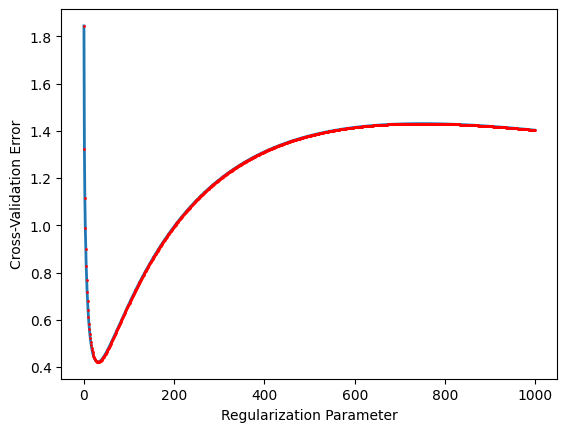

In [ ]:
gam3_values = np.arange(0.1, 1000.1, 1)
Cross_val_mse = np.zeros(gam3_values.shape)
ind = 0

for gam3 in gam3_values:

  for i in range(numFolds):

    fold_start = i * fold_size
    fold_end = (i + 1) * fold_size

    X_train = np.concatenate((x[:fold_start], x[fold_end:]), axis=0)
    y_train = np.concatenate((y[:fold_start], y[fold_end:]), axis=0)

    X_test = x[fold_start:fold_end]
    y_test = y[fold_start:fold_end]

    Psi_train = np.ones((np.size(X_train),1))
    Psi_test = np.ones((np.size(X_test),1))

    for j in range(1,deg + 1):
      Psi_train = np.concatenate((Psi_train,X_train**j),axis=1)
      Psi_test = np.concatenate((Psi_test,X_test**j),axis=1)

    Psi_size = (Psi_train.T @ Psi_train).shape
    theta_s = np.linalg.inv(Psi_train.T @ Psi_train + gam3*np.eye(Psi_size[0], Psi_size[1])) @ Psi_train.T @ y_train

    y_pred = Psi_test @ theta_s
    mse = np.mean((y_test - y_pred)**2)
    mse_values[i] = mse

  Cross_val_mse[ind] = np.mean(mse_values)
  ind = ind + 1

plt.plot(gam3_values, Cross_val_mse, linewidth=2, marker='o', markersize=1,
         markerfacecolor='r', markeredgecolor='r')
plt.xlabel('Regularization Parameter')
plt.ylabel('Cross-Validation Error')
plt.show()

**Task 2.6:** What is the optimal regularization parameter?

**Answer 2.6:** The data is randomly generated so this optimal value may change depending on the data. It should be around $\lambda^* = 16.1$.

In [ ]:
optimal_reg_index = np.argmin(Cross_val_mse)
c = gam3_values[optimal_reg_index]
print(c)

31.1


## **4  Further Exploration**

Now that you understand regularization and hyper-parameter, modify the tasks and investigate what happens. Some suggestions of things you could try:

* What happens if you fix the regularization parameter and preform hyperparamter tuning on the basis function in the model given in Equation (18).

* What if you generated two dimensional data (say from the `peaks` function), could you modify the cross validation code to solve this problem?

* Try different folds for cross validation, does this change anything?

* Try to do hyperparameter tuning using Lasso regularization.

* See if any of Python's inbuilt cross validation functions makes things easier: `KFold`, `cross_val_score`, etc.

---
 *M. Jones is the module leader of ACS6427 - Data Modelling and Machine Intelligence from the Department of Automatic Control and Systems Engineering, The University of Sheffield. E-mail: morgan.jones@sheffield.ac.uk